# analise amortizada

analise amortizada é uma analise da media de n execuções de uma algoritmo. 

A fila é uma estrutura abstrata de dados do tipo First In First Out com duas operações básicas: enqueue e dequeue.

In [15]:
class Fila:
    def __init__(self):
        self.front = []
        self.rear = []
    
    def enqueue(self,a):
        self.rear.append(a)
    
    def dequeue(self):
        if self.front:
            return self.front.pop()
        else:
            while self.rear:
                self.front.append(self.rear.pop())
            if self.front : 
                return self.front.pop() 
            else: 
                return None

a operação enqueue é O(1) no pior caso e dequeue é O(n) caso a pilha front esteja vazia e O(1) caso contrário ou seja, dequeue é O(n). Porem numa analise amortizada observaremos que esse custo O(n) será distribuido ao longo das operações de enqueue e dequeue tornando ambas O(1).


In [47]:
import sys, math, random, time


def amort(n,r):
    fila = Fila()
    t_count = 0
    for i in range(n):
        if random.random() > r:
            t = time.time()
            d = fila.dequeue()
            t_count += time.time() - t
        else:
            a = random.random()
            t = time.time()
            fila.enqueue(a)
            t_count += time.time() - t
    #print("time: {} n: {} r:{}".format( t_count, n, r) )
    return (n,t_count)




aqui vemos que o tempo gasto é proporcional ao numero de operações enqueue/dequeue.

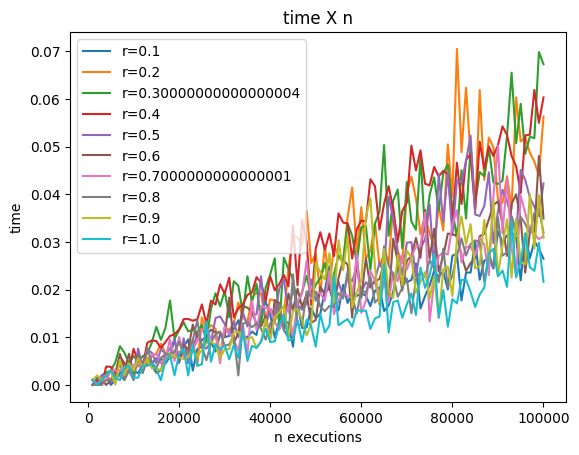

<Figure size 3000x1000 with 0 Axes>

In [62]:
import matplotlib.pyplot as plt

for j in range(10):
    X, Y = [],[]
    for i in range(100):
        x,y = amort(i*1000 + 1000, j*0.1 + 0.1)
        X.append(x)
        Y.append(y)
    l = "r={}".format(j*0.1 + 0.1)
   
    plt.plot(X, Y, label=l) 
    plt.xlabel('n executions')  
    plt.ylabel('time') 
    plt.title('time X n') 

plt.legend(loc='best')
plt.figure(figsize=(30,10))
plt.show() 

se olharmos (tempo/nº de operações) vemos que esta relação é constante como se cada operação enqueue/dequeue tivesse tempo constante O(1).

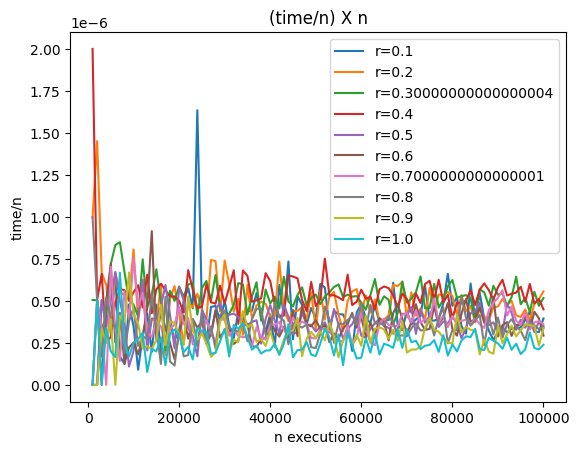

<Figure size 2000x1000 with 0 Axes>

In [59]:
import numpy as np

for j in range(10):
    X, Y = [],[]
    for i in range(100):
        x,y = amort(i*1000 + 1000, j*0.1 + 0.1)
        X.append(x)
        Y.append(y/(i*1000 + 1000))
    l = "r={}".format(j*0.1+ 0.1)
    plt.plot(X, Y, label=l) 
    plt.xlabel('n executions')  
    plt.ylabel('time/n') 
    plt.title('(time/n) X n') 
plt.legend(loc='best')

plt.figure(figsize=(20,10))
plt.show() 